 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [62]:

# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [63]:
# Reading whale returns
whale_returns_path = Path('Resources/whale_returns.csv')
df_whale_returns = pd.read_csv(whale_returns_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
df_whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [64]:
# Count nulls
df_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

##### From the result above we can see that there is only one null value in each of the columns.

In [65]:
# Drop nulls
df_whale_returns = df_whale_returns.dropna()
#checking to see if all the null values have been removed
df_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [66]:
# Reading algorithmic returns
algo_returns_path = Path('Resources/algo_returns.csv')
df_algo_returns = pd.read_csv(algo_returns_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
df_algo_returns.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [ ]:
# Count nulls
df_algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

##### From the result above we can see that there are 6 null values in the Algo 2 column

In [67]:
# Drop nulls
df_algo_returns = df_algo_returns.dropna()
#checking to see if all the null values have been removed
df_algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [68]:
# Reading S&P TSX 60 Closing Prices
# Setting the Date column as index and fixing the date and time format
snp_tsx_60_path = Path('Resources/sp_tsx_history.csv')
df_snp_tsx_60 = pd.read_csv(snp_tsx_60_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
#df_snp_tsx_60.describe(include='all')
df_snp_tsx_60.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [69]:
# Check Data Types
df_snp_tsx_60.dtypes

Close    object
dtype: object

##### The data type is object for the Close column

In [74]:
# Fix Data Types

#Removing the '$' symbol from the 'Close' column
df_snp_tsx_60['Close'] = df_snp_tsx_60['Close'].str.replace("$", "")

#Removing the ',' symbol from the 'Close' column
df_snp_tsx_60['Close'] = df_snp_tsx_60['Close'].str.replace(",", "")

# changing the data type 'Close' from object to float 
df_snp_tsx_60['Close'] = df_snp_tsx_60['Close'].astype('float')

#df_snp_tsx_60.head()

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [75]:
# Check Data Types
df_snp_tsx_60.dtypes

Close    float64
dtype: object

In [76]:
# Calculate Daily Returns
# Calculating thhe daily returns by calculating percentage change of the 'Close' column
# and replacing the values in the 'Close' column  with daily returns
df_snp_tsx_60['Close'] = df_snp_tsx_60.Close.pct_change()
#df_snp_tsx_60.head()

In [77]:
# Drop nulls
df_snp_tsx_60 = df_snp_tsx_60.dropna()
df_snp_tsx_60.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [78]:
# Rename `Close` Column to be specific to this portfolio.
df_snp_tsx_60 = df_snp_tsx_60.rename(columns={'Close': 'S&P TSX'})
#df_snp_tsx_60.loc['2015-03-03' : '2015-03-10']
df_snp_tsx_60

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [79]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
df_all_portfolios = pd.concat([df_whale_returns, df_algo_returns, df_snp_tsx_60], axis='columns', join='inner')
df_all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

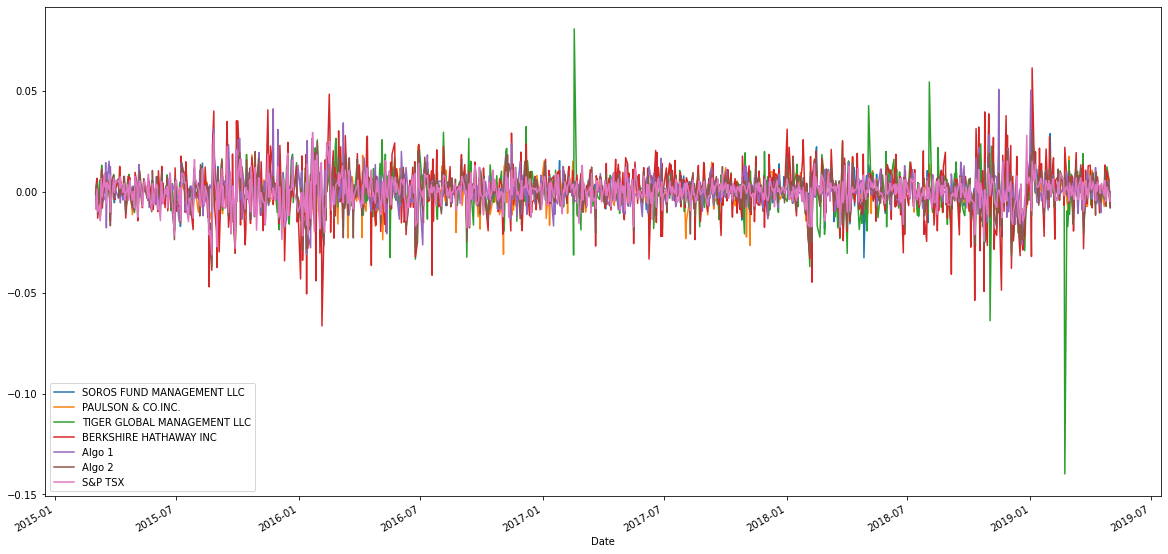

In [80]:
# Plot daily returns of all portfolios
df_all_portfolios.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

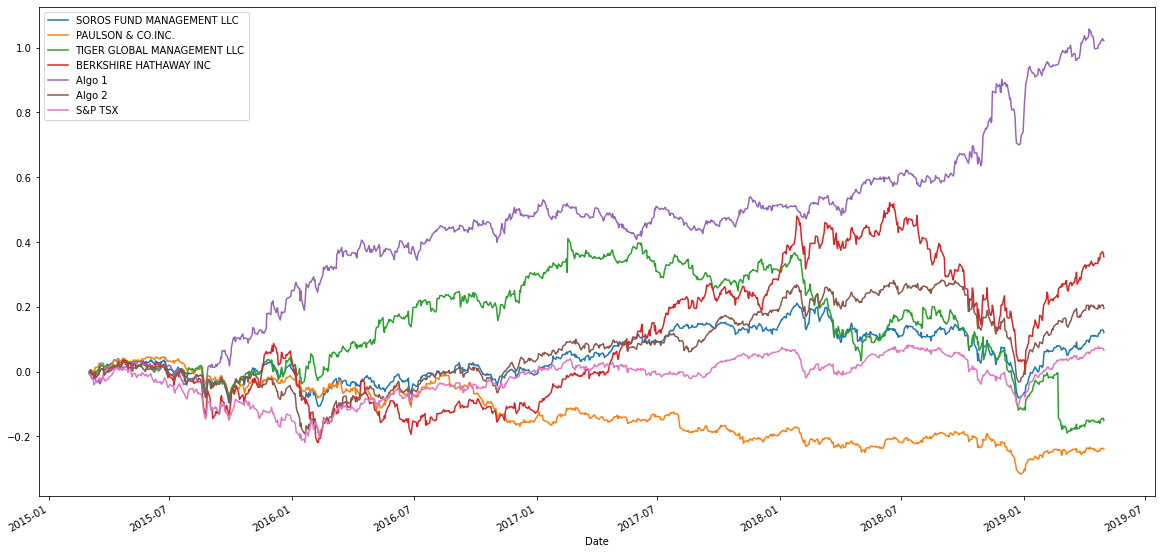

In [81]:
# Calculate cumulative returns of all portfolios
df_cumulative_returns = (1 + df_all_portfolios).cumprod()-1

# Plot cumulative returns
df_cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

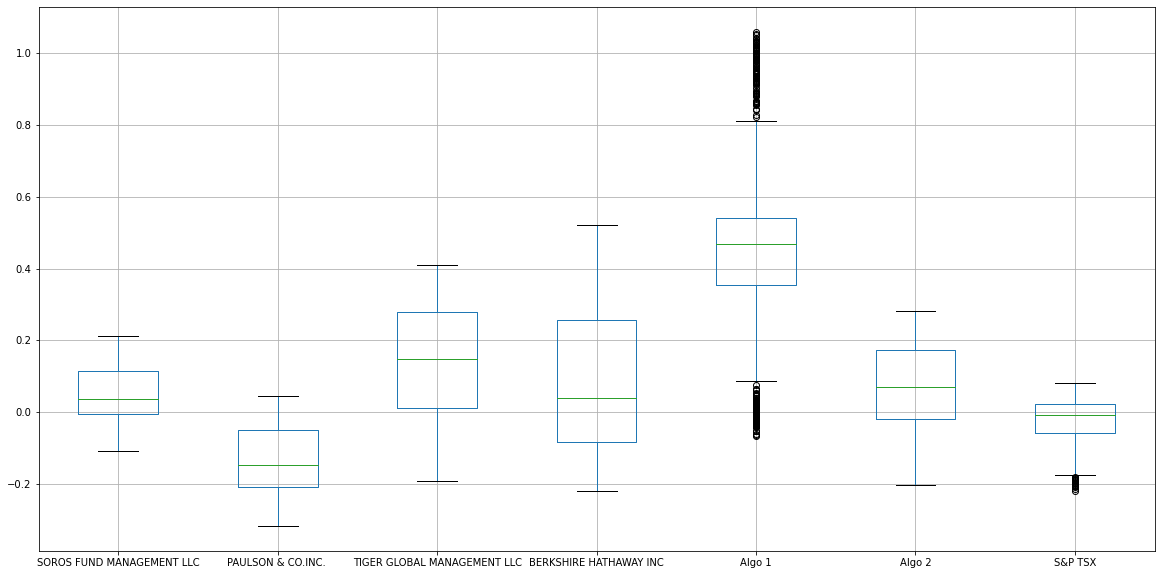

In [82]:
# Box plot to visually show risk
df_cumulative_returns.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [ ]:
# Calculate the daily standard deviations of all portfolios
df_all_portfolios_daily_std = df_all_portfolios.std()
df_all_portfolios_daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [ ]:
# Calculate  the daily standard deviation of S&P TSX 60
df_daily_std_snp = df_snp_tsx_60.std()
df_daily_std_snp
# Determine which portfolios are riskier than the S&P TSX 60
df_all_portfolios_daily_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

##### All the other portfolios except PAULSON & CO.INC are riskier than the S&P TSX 60, because higher the standard deviation higher the risk.

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
df_annual_std_all = df_all_portfolios_daily_std * np.sqrt(252)
df_annual_std_all

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

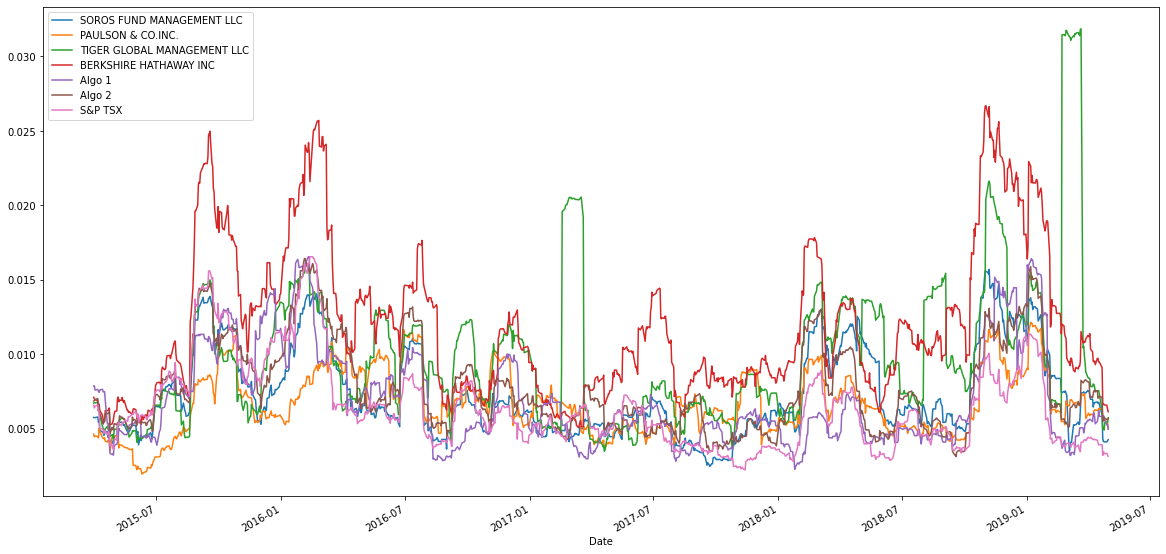

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_all_portfolios.rolling(window=21).std()
# Plot the rolling standard deviation
df_all_portfolios.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

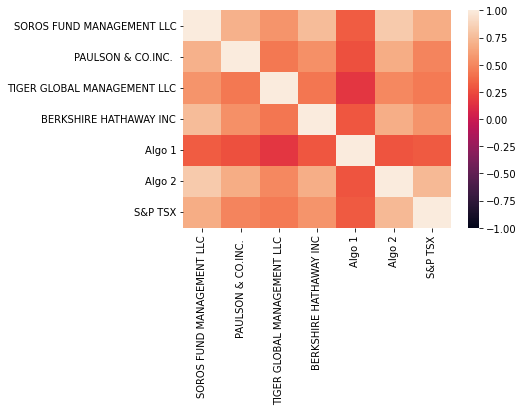

In [ ]:
# Calculate the correlation
df_returns_correlation = df_all_portfolios.corr()
# Display de correlation matrix
sns.heatmap(df_returns_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

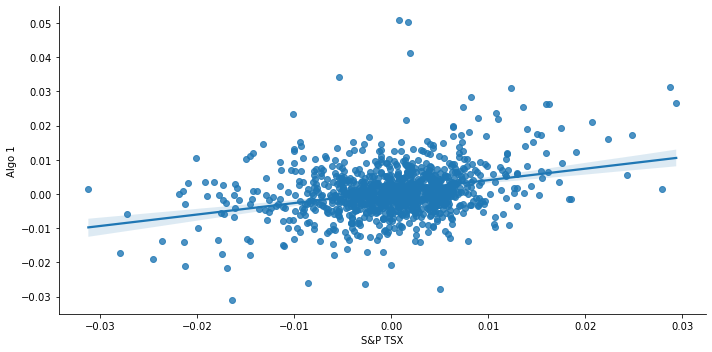

In [55]:
# Calculate covariance of a single portfolio
covariance_algo = df_algo_returns['Algo 1'].cov(df_snp_tsx_60['S&P TSX'])
covariance_algo
# Calculate variance of S&P TSX
variance_snp = df_snp_tsx_60['S&P TSX'].var()
variance_snp
# Computing beta
beta = covariance_algo / variance_snp
beta
# Plot beta trend
sns.lmplot(x='S&P TSX', y='Algo 1', data=df_all_portfolios,  aspect=2)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [139]:
# Use `ewm` to calculate the rolling window
df_all_portfolios_ewm = df_all_portfolios_daily_std.ewm(halflife=21)
df_all_portfolios_ewm

ExponentialMovingWindow [halflife=21,min_periods=1,adjust=True,ignore_na=False,axis=0]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [39]:
# Annualized Sharpe Ratios
sharpe_ratios = ((df_all_portfolios.mean()*252) / (df_all_portfolios.std() * np.sqrt(252)))
# sorting the sharpe ratios in descending order to have a quick view of which  
sharpe_ratios.sort_values(ascending=False)
                   

Algo 1                         1.491514
BERKSHIRE HATHAWAY INC         0.467045
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
S&P TSX                        0.195550
TIGER GLOBAL MANAGEMENT LLC   -0.144455
PAULSON & CO.INC.             -0.547594
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

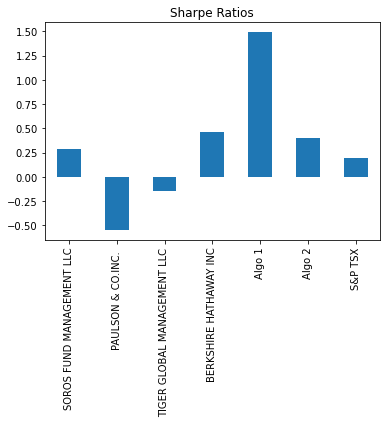

In [40]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The algorithmic strategies does outperform both the S&P TSX 60 and the Whale portfolio over the given period of time. Higher sharp ratios indicate higher risk adjusted rate of return. From the Sharpe ratio graph above we can see that the algorithmic strategies have both positive values, Algo 1 having the highest positive value of them all. The algorithmic strategies have a combined sharp ratio of 1.888331, whereas the Whale portfolio has 0.242041 followed by the S&P TSX 60 at 0.19555.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [83]:
# Reading data from 1st stock (GOOGLE)
goog_csv_path = Path('Resources/GOOGLE FINANCE DATA - GOOGLE.csv')
df_goog = pd.read_csv(goog_csv_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
df_goog = df_goog.rename(columns={'Close': 'GOOGLE'})
df_goog.head()

,GOOGLE
Date,
2015-01-02,26.17
2015-01-05,25.62
2015-01-06,25.03
2015-01-07,24.99
2015-01-08,25.07


In [84]:
# Reading data from 2nd stock
appl_csv_path = Path('Resources/GOOGLE FINANCE DATA - APPLE.csv')
df_appl = pd.read_csv(appl_csv_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
df_appl = df_appl.rename(columns={'Close': 'APPLE'})
df_appl.head()

,APPLE
Date,
2015-01-02,27.33
2015-01-05,26.56
2015-01-06,26.57
2015-01-07,26.94
2015-01-08,27.97


In [85]:
# Reading data from 3rd stock
tsla_csv_path = Path('Resources/GOOGLE FINANCE DATA - TESLA.csv')
df_tsla = pd.read_csv(tsla_csv_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
df_tsla = df_tsla.rename(columns={'Close': 'TESLA'})
df_tsla.head()

,TESLA
Date,
2015-01-02,14.62
2015-01-05,14.01
2015-01-06,14.09
2015-01-07,14.06
2015-01-08,14.04


In [86]:
# Combine all stocks in a single DataFrame
df_custom_portfolio =  pd.concat([df_goog, df_appl, df_tsla], axis='columns', join='inner')
df_custom_portfolio.head()

,GOOGLE,APPLE,TESLA
Date,,,
2015-01-02,26.17,27.33,14.62
2015-01-05,25.62,26.56,14.01
2015-01-06,25.03,26.57,14.09
2015-01-07,24.99,26.94,14.06
2015-01-08,25.07,27.97,14.04


In [87]:
# Reset Date index
df_custom_portfolio.index_col = 'Date'
df_custom_portfolio.head()

,GOOGLE,APPLE,TESLA
Date,,,
2015-01-02,26.17,27.33,14.62
2015-01-05,25.62,26.56,14.01
2015-01-06,25.03,26.57,14.09
2015-01-07,24.99,26.94,14.06
2015-01-08,25.07,27.97,14.04


In [88]:
# Reorganize portfolio data by having a column per symbol
df_custom_portfolio= df_custom_portfolio[['APPLE' , 'TESLA', 'GOOGLE']]
df_custom_portfolio.head()

,APPLE,TESLA,GOOGLE
Date,,,
2015-01-02,27.33,14.62,26.17
2015-01-05,26.56,14.01,25.62
2015-01-06,26.57,14.09,25.03
2015-01-07,26.94,14.06,24.99
2015-01-08,27.97,14.04,25.07


In [89]:
# Calculate daily returns
df_custom_portfolio = df_custom_portfolio.pct_change()
# Drop NAs 
df_custom_portfolio = df_custom_portfolio.dropna()
# Display sample data
df_custom_portfolio.head()

,APPLE,TESLA,GOOGLE
Date,,,
2015-01-05,-0.028174,-0.041724,-0.021016
2015-01-06,0.000377,0.005710,-0.023029
2015-01-07,0.013925,-0.002129,-0.001598
2015-01-08,0.038233,-0.001422,0.003201
2015-01-09,0.001073,-0.018519,-0.013163


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [91]:
# Set weights
weights = [1/3, 1/3, 1/3]
appl_weight = 0.333333
goog_weight = 0.333333
tsla_weight = 0.333333

# Calculate portfolio return
portfolio_returns = appl_weight * df_custom_portfolio['APPLE'] + goog_weight * df_custom_portfolio['GOOGLE'] + tsla_weight * df_custom_portfolio['TESLA'] 
portfolio_returns
# Display sample data


Date
2015-01-05   -0.030305
2015-01-06   -0.005647
2015-01-07    0.003399
2015-01-08    0.013337
2015-01-09   -0.010203
                ...   
2019-12-23    0.016460
2019-12-24    0.003814
2019-12-26    0.015249
2019-12-27   -0.002709
2019-12-30   -0.013952
Length: 1256, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [99]:
# Join your returns DataFrame to the original returns DataFrame
df_combined_portfolio_returns = pd.concat([df_all_portfolios, df_custom_portfolio], axis='columns', join='inner')
df_combined_portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,APPLE,TESLA,GOOGLE
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,0.002169,0.010638,0.003861
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.006184,0.015038,-0.000350
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.016801,-0.008889,0.003498
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,0.001582,-0.033632,-0.013245
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.004423,-0.015468,0.001766
...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.009075,-0.042343,0.005892
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.004677,-0.050273,0.006965
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.001370,0.026786,0.012105


In [101]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df_combined_portfolio_returns = df_combined_portfolio_returns.dropna()
df_combined_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,APPLE,TESLA,GOOGLE
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,0.002169,0.010638,0.003861
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.006184,0.015038,-0.000350
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.016801,-0.008889,0.003498
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,0.001582,-0.033632,-0.013245
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.004423,-0.015468,0.001766


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [105]:
# Calculate the annualized `std`
# Calculating the daily Standard deviation 
df_daily_std_combined_portfolio = df_combined_portfolio_returns.std()
# Using the daily standard deviation calculating the annualised standard deviation
df_annualised_std_combined_portfolio = df_daily_std_combined_portfolio * np.sqrt(252)
df_annualised_std_combined_portfolio

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
APPLE                          0.246181
TESLA                          0.443196
GOOGLE                         0.240378
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

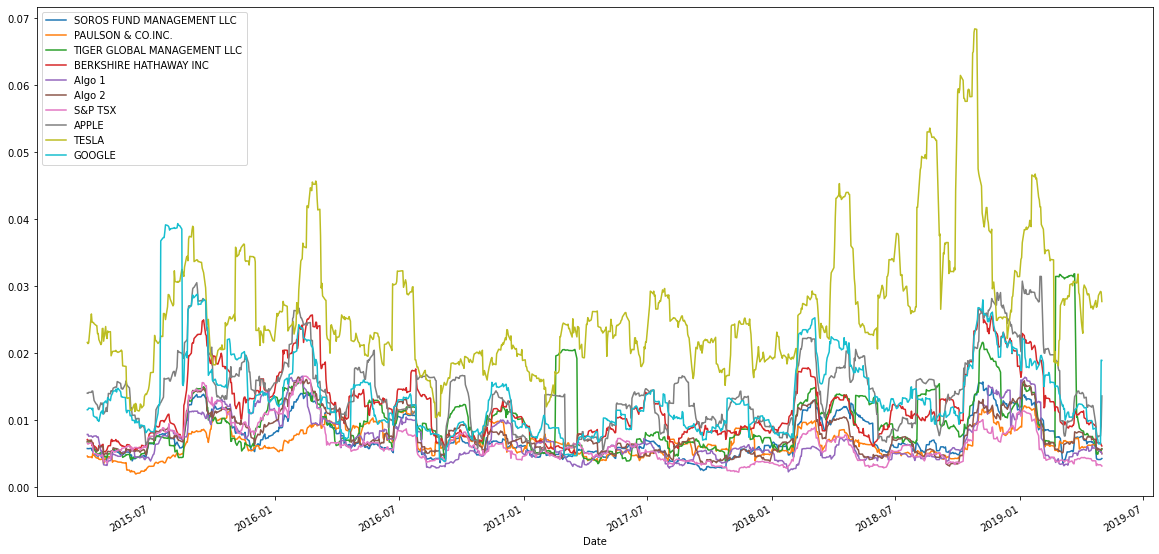

In [111]:
# Calculate rolling standard deviation
df_combined_portfolio_returns.rolling(window=21).std()
# Plot rolling standard deviation
df_combined_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

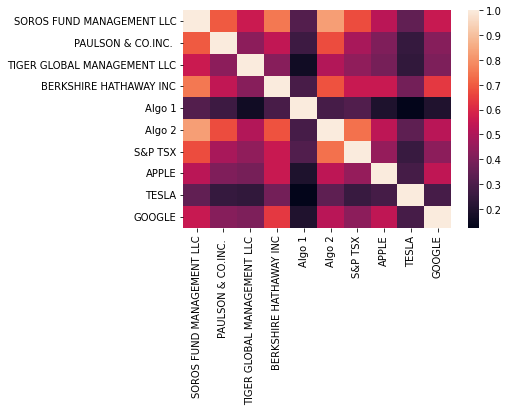

In [155]:
# Calculate and plot the correlation
combined_correlation = df_combined_portfolio_returns.corr()
sns.heatmap(combined_correlation)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [151]:
# Calculate and plot Beta
# Calculating the 60 day rolling covariance 
df_combined_portfolio_covariance = df_combined_portfolio_returns.rolling(window=60).cov(df_combined_portfolio_returns['S&P TSX'])
df_combined_portfolio_covariance
# Calculating the 60 day rolling variance
df_combined_portfolio_variance = df_combined_portfolio_returns['S&P TSX'].rolling(window=60).var()
df_combined_portfolio_variance
# Calculating the beta by dividing the covariance by the variance
df_combined_portfolio_beta = df_combined_portfolio_covariance / df_combined_portfolio_variance

df_combined_portfolio_beta

,2015-03-03 00:00:00,2015-03-04 00:00:00,2015-03-05 00:00:00,2015-03-06 00:00:00,2015-03-09 00:00:00,2015-03-10 00:00:00,2015-03-11 00:00:00,2015-03-12 00:00:00,2015-03-13 00:00:00,2015-03-16 00:00:00,...,APPLE,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,GOOGLE,PAULSON & CO.INC.,S&P TSX,SOROS FUND MANAGEMENT LLC,TESLA,TIGER GLOBAL MANAGEMENT LLC
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [132]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_all = ((df_combined_portfolio_returns.mean()*252) / (df_combined_portfolio_returns.std() * np.sqrt(252)))
sharpe_ratios_all
sharpe_ratios_all.sort_values(ascending=False)

Algo 1                         1.491514
GOOGLE                         0.719485
APPLE                          0.489420
BERKSHIRE HATHAWAY INC         0.467045
Algo 2                         0.396817
TESLA                          0.371715
SOROS FUND MANAGEMENT LLC      0.286709
S&P TSX                        0.195550
TIGER GLOBAL MANAGEMENT LLC   -0.144455
PAULSON & CO.INC.             -0.547594
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios for all portfolios'}>

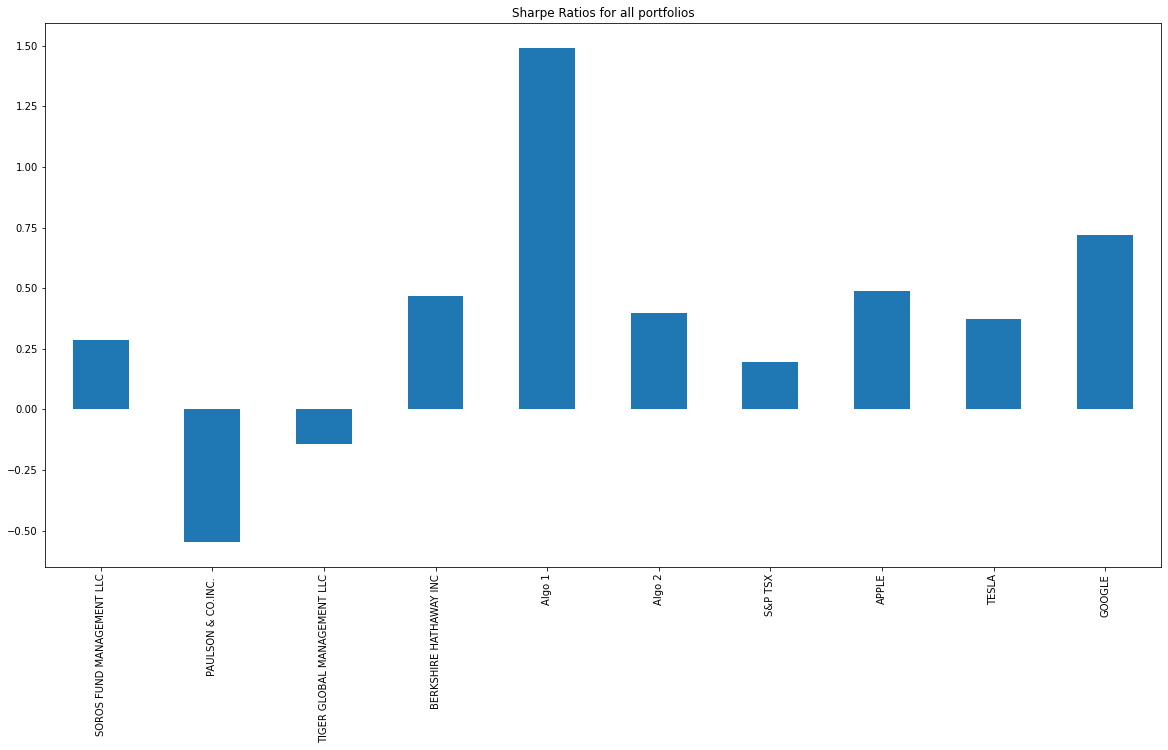

In [135]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind='bar', title='Sharpe Ratios for all portfolios', figsize=[20,10])

### How does your portfolio do?

Write your answer here!

#### My portfolio consisting of Apple, Google and Tesla, performs better than both the Whale portfolio and the S&P TSX 60, as can be seen from the higher sharpe ratio values. It is only outperformed by the Algorithmic portfolio.